### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

| Variable Name   | Role      | Type       | Demographic        | Description                                                                 | Units    | Missing Values |
|-----------------|-----------|------------|--------------------|-----------------------------------------------------------------------------|----------|-----------------|
| age             | Feature   | Integer    | Age                | -                                                                           | -        | No              |
| job             | Feature   | Categorical| Occupation         | Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | -        | No              |
| marital         | Feature   | Categorical| Marital Status     | Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) | -        | No              |
| education       | Feature   | Categorical| Education Level    | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | -        | No              |
| default         | Feature   | Binary     | -                  | Has credit in default?                                                       | -        | No              |
| balance         | Feature   | Integer    | -                  | Average yearly balance                                                      | Euros    | No              |
| housing         | Feature   | Binary     | -                  | Has housing loan?                                                           | -        | No              |
| loan            | Feature   | Binary     | -                  | Has personal loan?                                                          | -        | No              |
| contact         | Feature   | Categorical| -                  | Contact communication type (categorical: 'cellular','telephone')             | -        | Yes             |
| day_of_week     | Feature   | Date       | -                  | Last contact day of the week                                                | -        | No              |


The data comes from the **UCI Machine Learning Repository**, specifically the **Bank Marketing Dataset**. According to the documentation and the **Materials and Methods** section of the associated paper, the data represents marketing campaigns from a bank.

The dataset specifically corresponds to **one marketing campaign**. This campaign was conducted by a Portuguese banking institution, and the data consists of information on client interactions and whether those clients subscribed to a term deposit after being contacted by the bank. 

The data includes information such as:

- The features of the clients (e.g., age, job, marital status, etc.)
- The results of marketing campaigns (e.g., whether the client subscribed to the term deposit or not)

---

### Problem 2: Read in the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# Validate data types
data_types = df.dtypes
data_types

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# List of categorical columns based on dataset description
categorical_columns = [
    "job", "marital", "education", "default", 
    "housing", "loan", "contact", "month", 
    "day_of_week", "poutcome", "y"
]

# Count 'unknown' occurrences in categorical columns
unknown_counts = {col: df[col].value_counts().get('unknown', 0) for col in categorical_columns}

# Display the counts of 'unknown'
print("Counts of 'unknown' in categorical columns:")
for col, count in unknown_counts.items():
    print(f"{col}: {count}")


Counts of 'unknown' in categorical columns:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0


### Problem 4: Understanding the Task

The main objective of this task is to predict or understand patterns related to customer behavior and credit characteristics for a financial institution, particularly in relation to marketing campaigns for banking products. The dataset provides various features, such as demographic information (age, job, marital status, education level), financial details (balance, housing loan, personal loan), and behavioral factors (contact type, last contact day), which can be analyzed to identify potential customers for targeted offers like housing or personal loans, credit defaults, or other financial services.

The business objective of this task is to perform exploratory data analysis (EDA), preprocess and encode the dataset, and then apply four machine learning models to predict or classify a target outcome based on customer information. Specifically, the goal is to:

1. **Perform Exploratory Data Analysis (EDA):** Investigate and visualize the dataset to uncover patterns, detect anomalies, understand relationships between variables, and summarize the key features.
  
2. **Data Encoding:** Transform categorical variables into numerical representations through appropriate encoding techniques to prepare the dataset for modeling.

3. **Model Building:** Apply the following four machine learning algorithms to the dataset to assess their performance:
   - **K-Nearest Neighbors (KNN):** A non-parametric method used for classification based on proximity to nearest neighbors.
   - **Decision Trees (DT):** A tree-based model that splits data into branches to make predictions based on feature values.
   - **Logistic Regression (LR):** A statistical method used for binary classification based on the relationship between input features and the outcome.
   - **Support Vector Machine (SVM):** A supervised learning model that finds an optimal hyperplane to classify data into different categories.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# 1. Summary statistics for numerical columns
print("Summary Statistics:")
df.describe()

Summary Statistics:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# 3. Distribution of categorical features
categorical_columns = df.select_dtypes(include='object').columns
print("\nCategorical Features Distribution:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Categorical Features Distribution:

job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan:
loan
no         33950
yes         6248
unknown      990
Nam

In [11]:
# 5. Target variable distribution
print("\nTarget Variable (y) Distribution:")
print(df['y'].value_counts())


Target Variable (y) Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


The target variable **y** in the dataset is imbalanced, with a significantly larger number of "no" instances compared to "yes" instances. Specifically, there are 36,548 records labeled as "no," while only 4,640 records are labeled as "yes." This disparity indicates that the dataset is skewed towards the "no" category, which may impact the performance of machine learning models. Addressing this imbalance is crucial to ensure the model performs well on both classes, especially the minority class ("yes"). Techniques such as oversampling, undersampling, or using algorithms designed to handle imbalanced data can help mitigate this issue.

# EDA

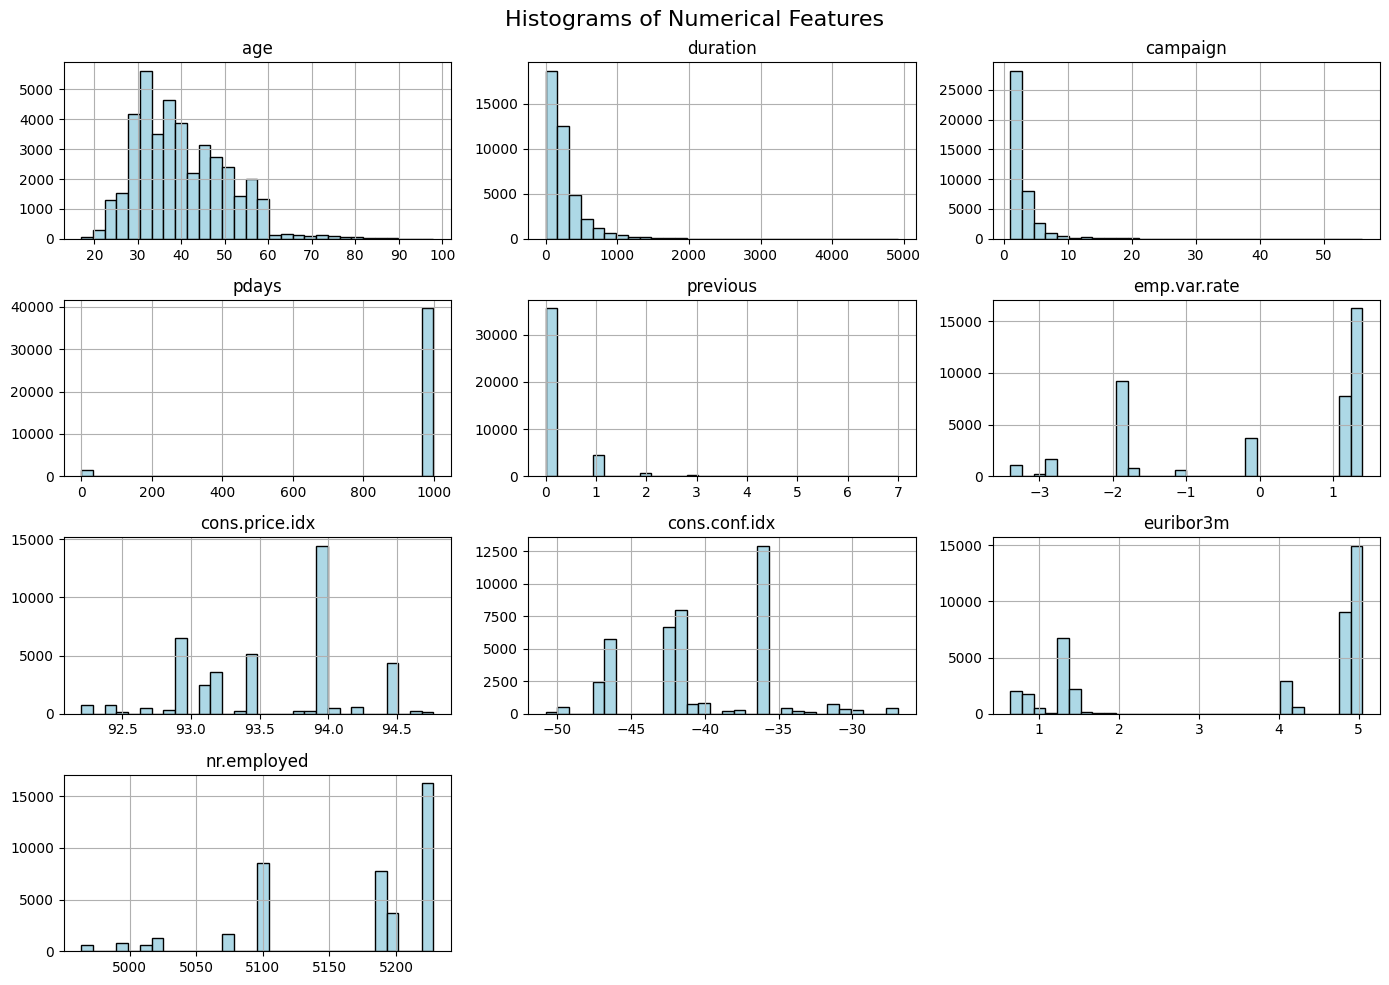

In [12]:
numerical_columns = df.select_dtypes(include='number').columns

# Visualizations
# Histograms for numerical features
df[numerical_columns].hist(figsize=(14, 10), bins=30, color='lightblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

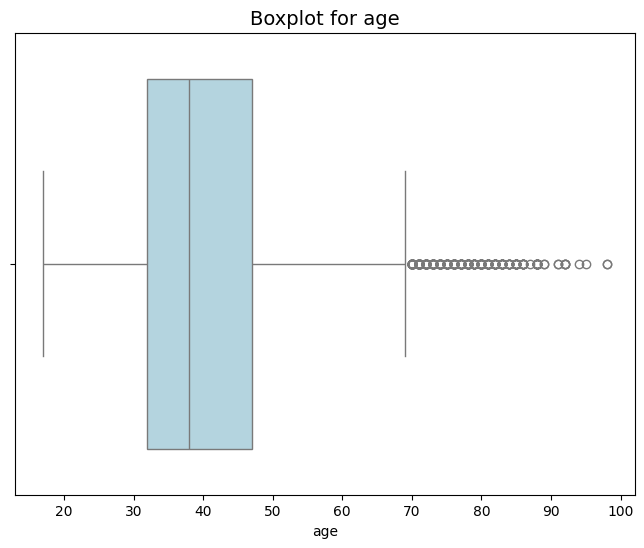

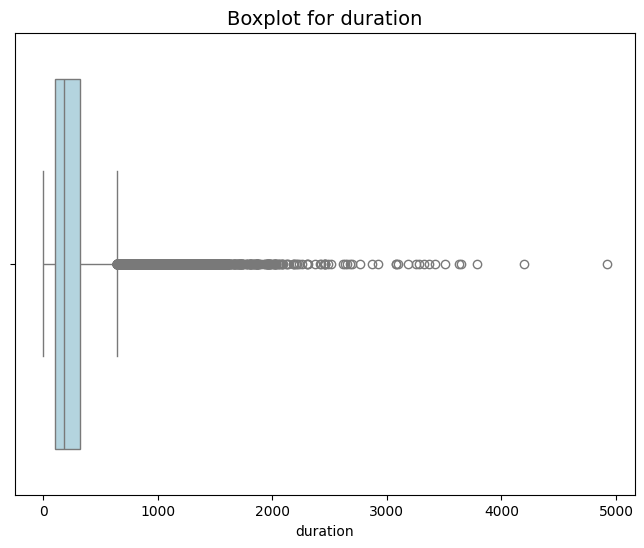

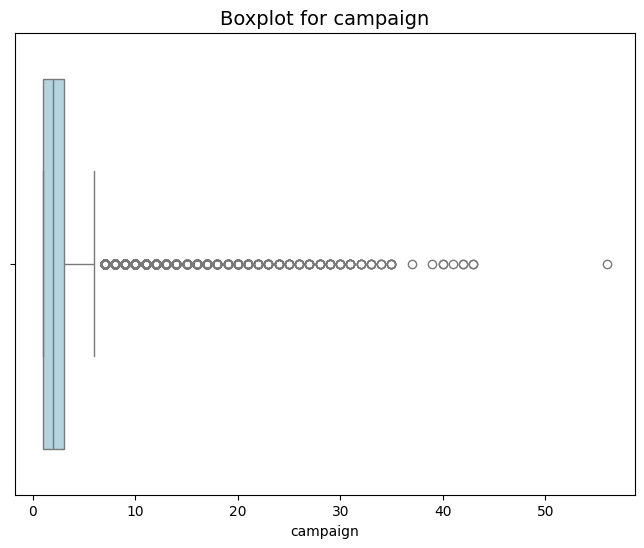

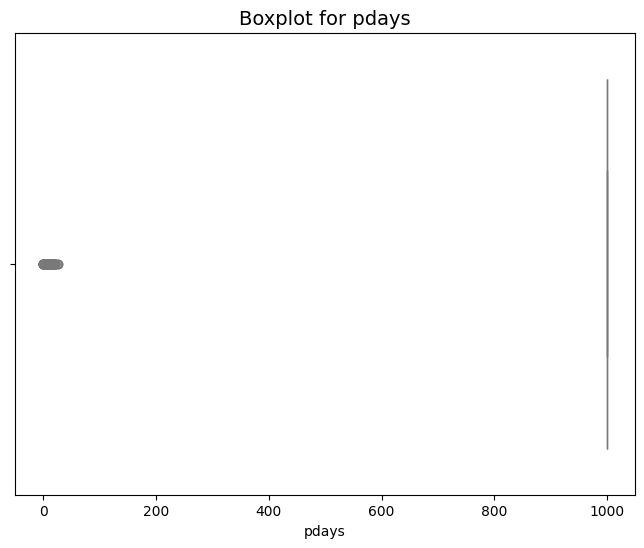

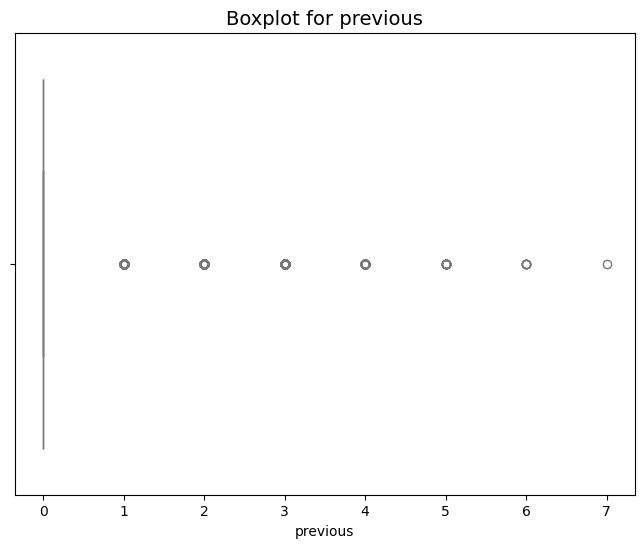

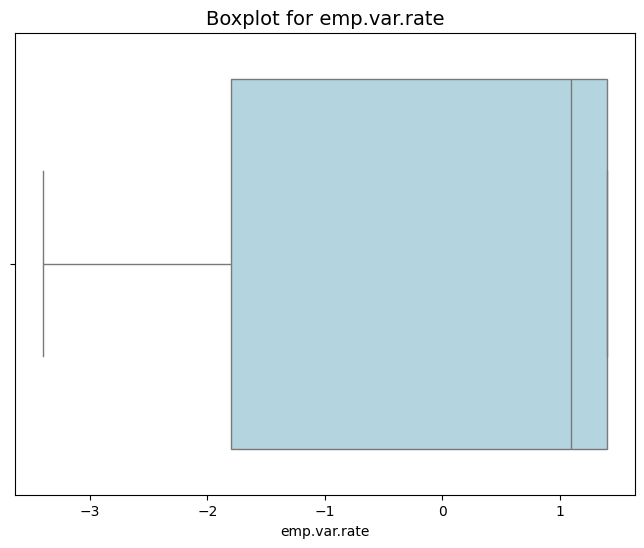

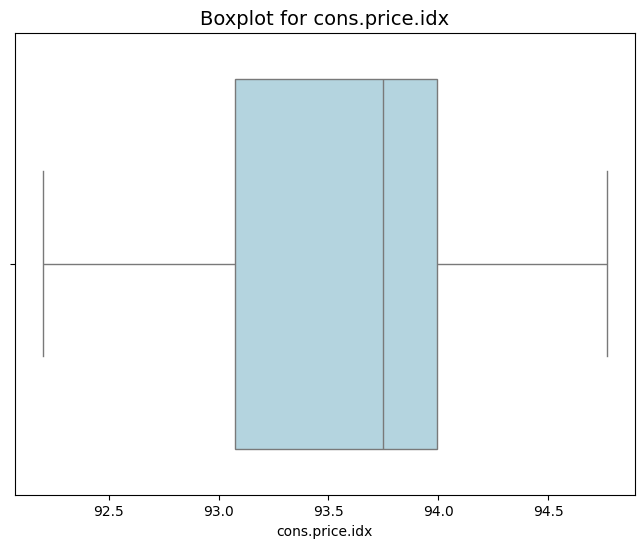

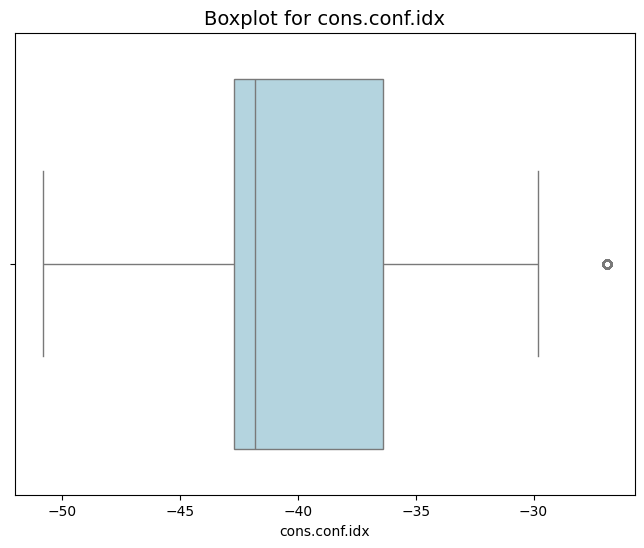

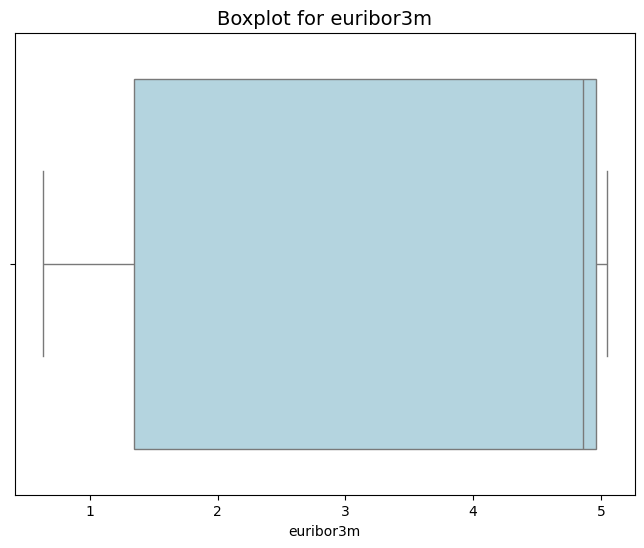

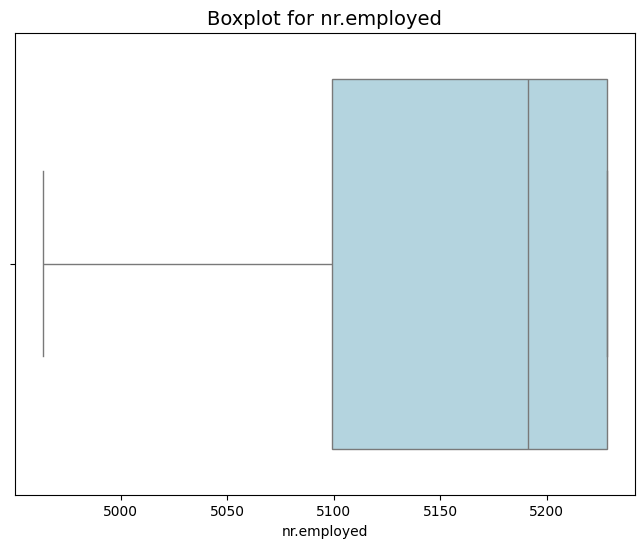

In [13]:
# Boxplots for numerical features to detect outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.show()

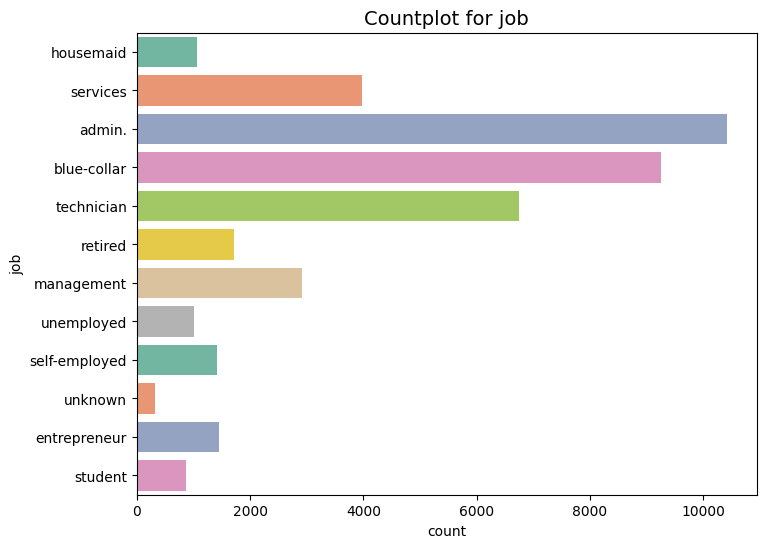

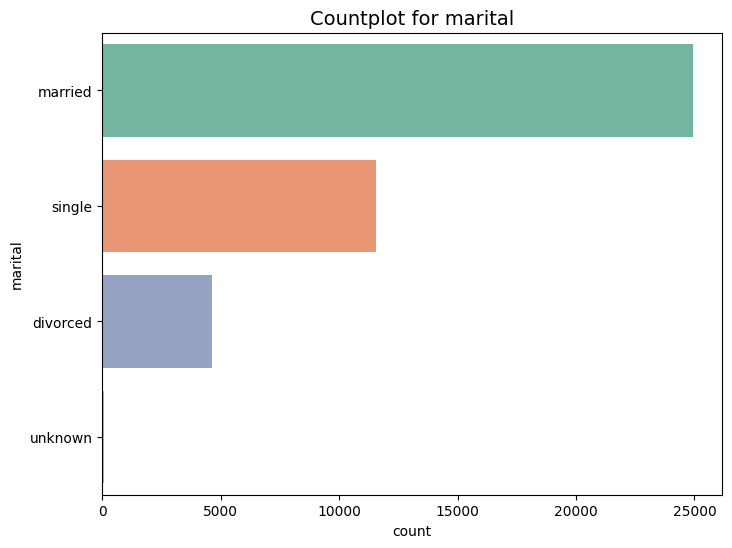

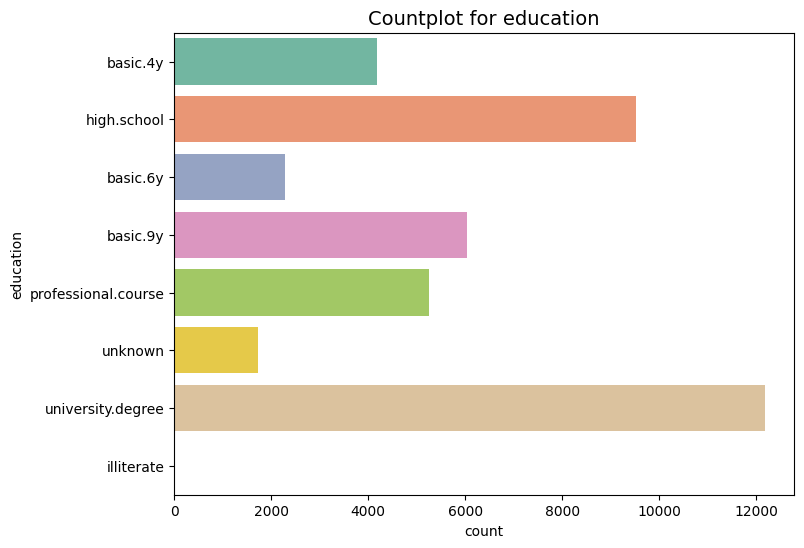

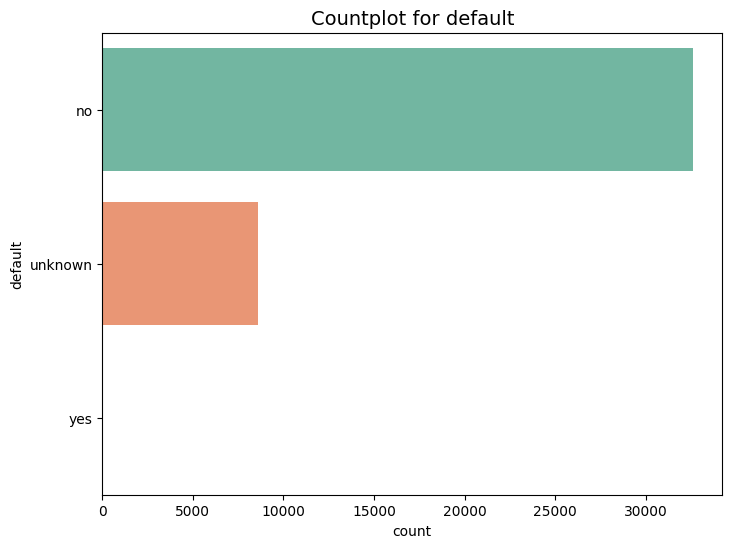

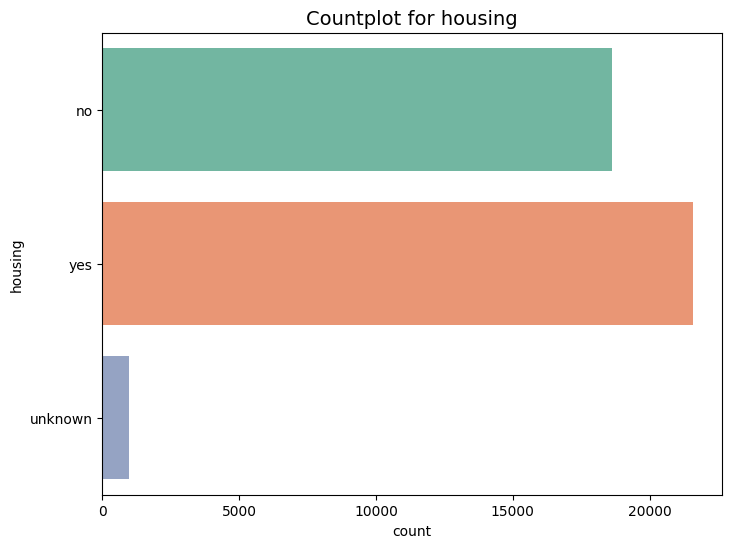

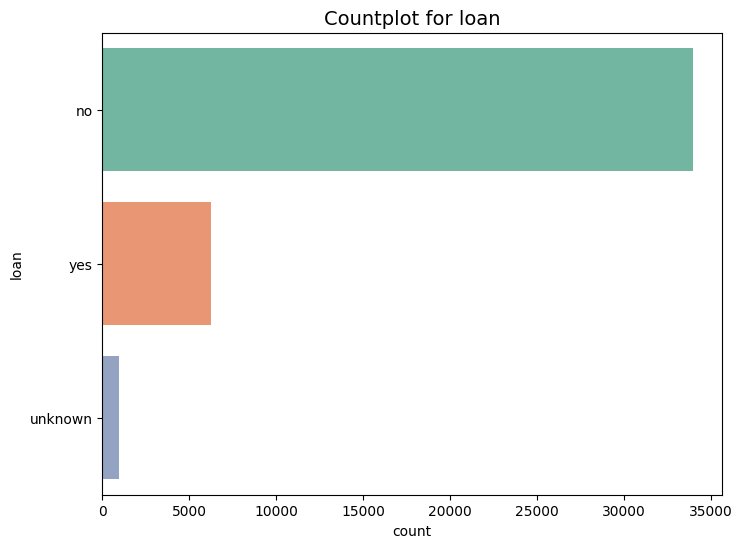

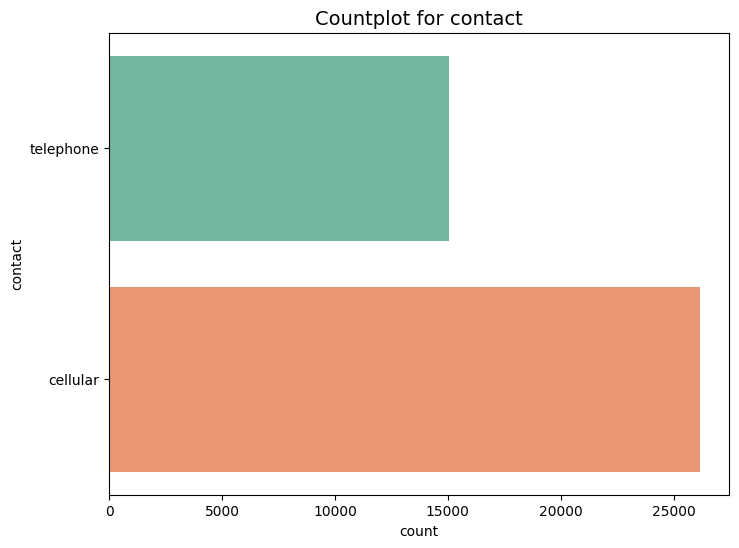

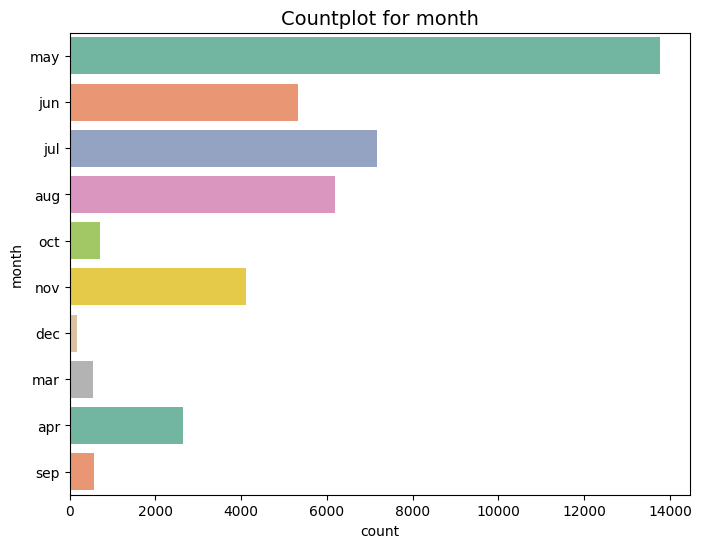

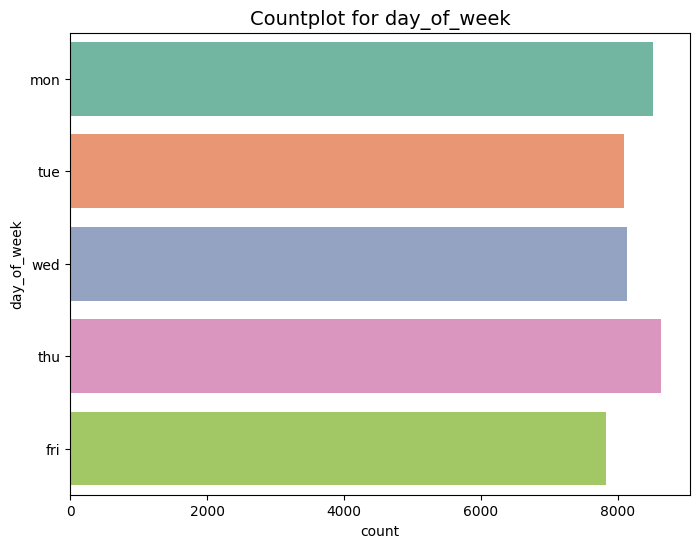

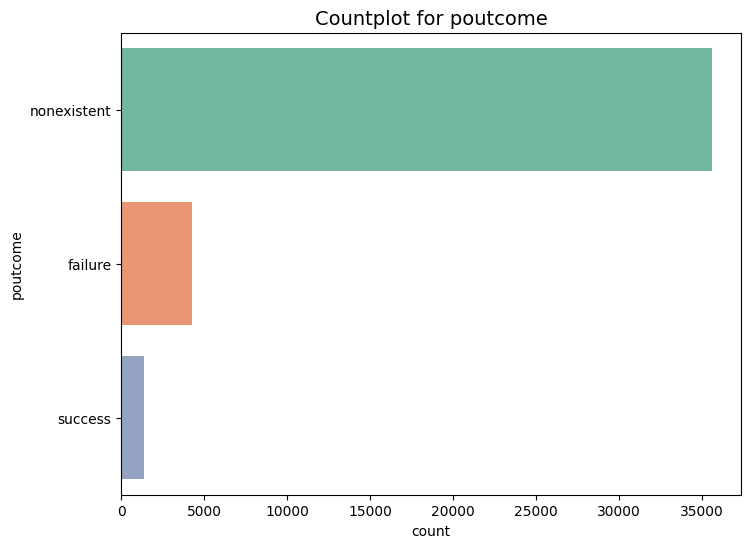

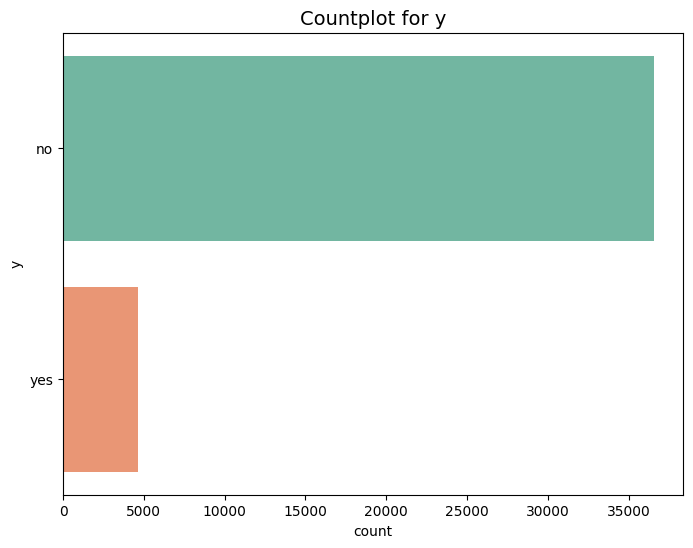

In [14]:
# Countplots for categorical features
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=df[col], hue=df[col], palette='Set2', legend=False)
    plt.title(f"Countplot for {col}", fontsize=14)
    plt.show()

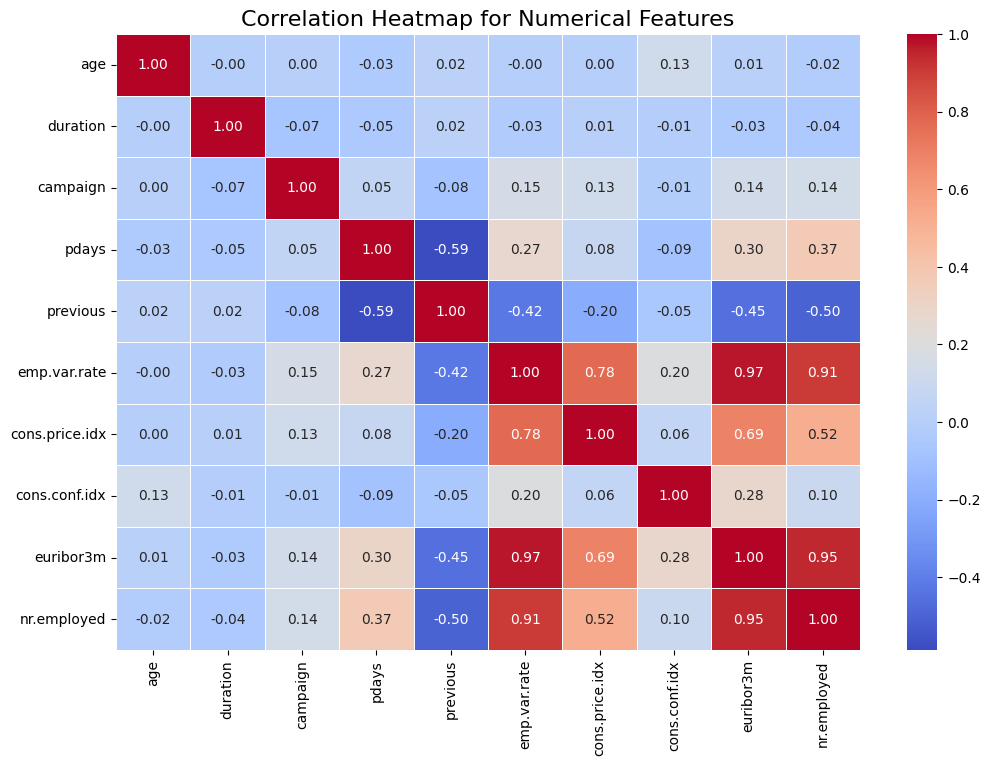

In [15]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features", fontsize=16)
plt.show()

### Problem 5: Engineering Features

We understood business objective, and now we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [16]:
# Select only the relevant columns (bank information features)
bank_features = [
    "age", "job", "marital", "education", "default", 
    "housing", "loan", "contact", "month", "day_of_week", "duration"
]
target_column = "y"


In [17]:
# Subset the dataset
X = df[bank_features]
y = df[target_column]

In [18]:
# One-hot encode categorical features
categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_features])

In [19]:
# Scale numerical features
numerical_features = ["age", "duration"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

In [20]:
# Combine the transformed features
X_prepared = np.hstack([X_scaled, X_encoded])

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Problem 6: Train/Test Split

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [22]:
# Calculate the baseline by determining the majority class
majority_class = np.argmax(np.bincount(y_encoded))
majority_class_count = np.sum(y_encoded == majority_class)
total_count = len(y_encoded)

# Calculate baseline accuracy
baseline_accuracy = majority_class_count / total_count


In [23]:
print(f"Majority Class: {majority_class} ({label_encoder.inverse_transform([majority_class])[0]})")
print(f"Baseline Accuracy: {baseline_accuracy:.2%}")

Majority Class: 0 (no)
Baseline Accuracy: 88.73%


### Problem 8: A Simple Model

#### **1. K-Nearest Neighbor (KNN)**

In [24]:
# Initialize the k-NN classifier with a chosen number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on both training and testing sets
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

# Compute accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Output the accuracies
print(f"Training Accuracy of K-Nearest Neighbor: {train_accuracy:.2%}")
print(f"Testing Accuracy of K-Nearest Neighbor: {test_accuracy:.2%}")

# Detailed classification report for the testing set
print("\nClassification Report for Testing Set:")
print(classification_report(y_test, test_pred, target_names=label_encoder.classes_))


Training Accuracy of K-Nearest Neighbor: 91.96%
Testing Accuracy of K-Nearest Neighbor: 89.41%

Classification Report for Testing Set:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7310
         yes       0.56      0.30      0.39       928

    accuracy                           0.89      8238
   macro avg       0.74      0.63      0.66      8238
weighted avg       0.88      0.89      0.88      8238



#### **2. Logistic Regression (LR)**

In [25]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on both training and testing sets
train_pred = log_reg.predict(X_train)
test_pred = log_reg.predict(X_test)

# Compute accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Output the accuracies
print(f"Training Accuracy of Logistic Regression: {train_accuracy:.2%}")
print(f"Testing Accuracy of Logistic Regression: {test_accuracy:.2%}")

# Detailed classification report for the testing set
print("\nClassification Report for Testing Set:")
print(classification_report(y_test, test_pred, target_names=label_encoder.classes_))


Training Accuracy of Logistic Regression: 89.79%
Testing Accuracy of Logistic Regression: 90.42%

Classification Report for Testing Set:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7310
         yes       0.66      0.31      0.42       928

    accuracy                           0.90      8238
   macro avg       0.79      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238



#### **3. Decision Tree (DT)**

In [26]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on both training and testing sets
train_pred = decision_tree.predict(X_train)
test_pred = decision_tree.predict(X_test)

# Compute accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Output the accuracies
print(f"Training Accuracy of Decision Tree: {train_accuracy:.2%}")
print(f"Testing Accuracy of Decision Tree: {test_accuracy:.2%}")

# Detailed classification report for the testing set
print("\nClassification Report for Testing Set:")
print(classification_report(y_test, test_pred, target_names=label_encoder.classes_))


Training Accuracy of Decision Tree: 100.00%
Testing Accuracy of Decision Tree: 85.94%

Classification Report for Testing Set:
              precision    recall  f1-score   support

          no       0.93      0.91      0.92      7310
         yes       0.39      0.44      0.41       928

    accuracy                           0.86      8238
   macro avg       0.66      0.68      0.67      8238
weighted avg       0.87      0.86      0.86      8238



#### **4. Support Vector Machine (SVM)**

In [27]:
# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
train_pred = svm_model.predict(X_train)
test_pred = svm_model.predict(X_test)

# Compute accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Output the accuracies
print(f"Training Accuracy of Support Vector Machine: {train_accuracy:.2%}")
print(f"Testing Accuracy of Support Vector Machine: {test_accuracy:.2%}")

# Detailed classification report for the testing set
print("\nClassification Report for Testing Set:")
print(classification_report(y_test, test_pred, target_names=label_encoder.classes_))


Training Accuracy of Support Vector Machine: 88.82%
Testing Accuracy of Support Vector Machine: 88.93%

Classification Report for Testing Set:
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7310
         yes       0.74      0.03      0.05       928

    accuracy                           0.89      8238
   macro avg       0.81      0.51      0.50      8238
weighted avg       0.87      0.89      0.84      8238



### Problem 9: Score the Model

**Logistic Regression** is the best model for this scenario because:
- It achieves the highest testing accuracy (90.42%).
- It balances precision, recall, and F1-score better than the other models.
- It is less prone to overfitting compared to Decision Tree and SVM.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|K-Nearest Neighbor|0.01s|91.96|89.41|
|Linear Regression|0.49s|89.79|90.42|
|Decision Tree|0.65s|100.00|85.94|
|Support Vector Machine |64.38s|88.82|88.93|

In [28]:
# Function to train, test, and record results for a model
def evaluate_model(model, model_name):
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train)  # Train the model
    end_time = time.time()  # Record end time
    train_time = end_time - start_time  # Calculate training time
    
    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    return {
        "Model": model_name,
        "Train Time": f"{train_time:.2f}s",
        "Train Accuracy": f"{train_accuracy:.2%}",
        "Test Accuracy": f"{test_accuracy:.2%}",
    }

# Define models
models = [
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbor"),
    (LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (SVC(kernel='linear', random_state=42), "Support Vector Machine"),
]

# Evaluate each model
results = [evaluate_model(model, name) for model, name in models]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
results_df


,Model,Train Time,Train Accuracy,Test Accuracy
0,K-Nearest Neighbor,0.01s,91.96%,89.41%
1,Logistic Regression,0.25s,89.79%,90.42%
2,Decision Tree,0.56s,100.00%,85.94%
3,Support Vector Machine,61.28s,88.82%,88.93%


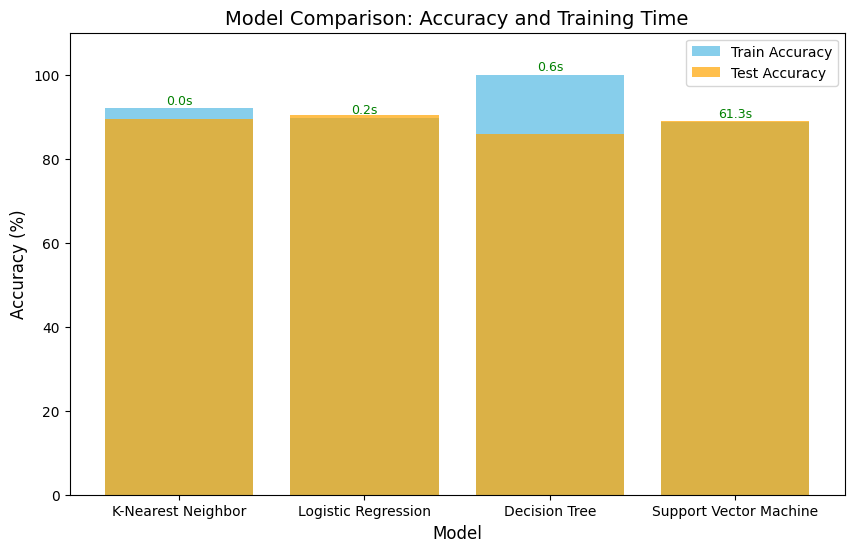

In [29]:
# Visualize results
plt.figure(figsize=(10, 6))
x = results_df["Model"]
train_acc = [float(acc.strip('%')) for acc in results_df["Train Accuracy"]]
test_acc = [float(acc.strip('%')) for acc in results_df["Test Accuracy"]]
train_time = [float(t.strip('s')) for t in results_df["Train Time"]]

# Plot train and test accuracy
plt.bar(x, train_acc, color='skyblue', label='Train Accuracy')
plt.bar(x, test_acc, color='orange', alpha=0.7, label='Test Accuracy')

# Add train time as text above bars
for i, (ta, te, tt) in enumerate(zip(train_acc, test_acc, train_time)):
    plt.text(i, ta + 1, f"{tt:.1f}s", ha='center', fontsize=9, color='green')

plt.title("Model Comparison: Accuracy and Training Time", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.legend()
plt.ylim(0, 110)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [33]:
# Define the Logistic Regression parameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # ElasticNet is omitted since it's not supported by all solvers
    'solver': ['liblinear', 'saga'],  # liblinear supports l1 penalty, saga supports l1 and elasticnet
    'max_iter': [100, 200]
}


In [34]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

In [35]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

In [36]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract the best parameters and model
best_lr = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [37]:
# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, best_lr.predict(X_test))

# Output the results
print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.2%}")
print(f"Testing Accuracy with Best Model: {test_accuracy:.2%}")

Best Hyperparameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 89.79%
Testing Accuracy with Best Model: 90.42%


Initially, I applied four machine learning models to the dataset: **K-Nearest Neighbors (KNN)**, **Logistic Regression (LR)**, **Decision Tree (DT)**, and **Support Vector Machine (SVM)**. Among these, the **Logistic Regression model** achieved the highest accuracy. 

To further improve its performance, I performed hyperparameter tuning on the Logistic Regression model. However, the tuned model achieved the same accuracy as the original model. This is likely due to the dataset being imbalanced, which can limit the model's ability to improve its predictions, particularly for the minority class.

---
### Recommendations for the Dataset:

Based on the dataset provided and the fact that there are no missing values, the following recommendations can enhance the analysis and performance of predictive models:

#### **1. Data Enrichment:**
While the dataset includes a good range of variables, adding more features could improve the model’s ability to identify patterns and predict responses. Some suggestions include:
   - **Customer Transaction Data:** Include information about the frequency, amount, and types of transactions (e.g., deposits, withdrawals).
   - **Customer Behavior Data:** Collect data on how customers interact with the bank (e.g., website visits, mobile app usage).
   - **Time-on-Books:** Measure how long the customer has been with the bank, which could reflect loyalty or engagement levels.
   - **Demographic Information:** Collect additional demographic variables such as income level, employment duration, or family size.


#### **2. Target Variable Balancing:**
   - The target variable (`y`) in bank marketing datasets is often imbalanced. If this is the case, consider addressing this issue using:
     - **Oversampling techniques** such as SMOTE.
     - **Undersampling techniques** to balance the classes.
     - **Class-weighting in models** to give more importance to the minority class.
